In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import torch
import torch.nn as nn
from tqdm import tqdm
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics

In [3]:
import ultralytics
from ultralytics import YOLO
from ultralytics.nn.modules import C2f
from ultralytics.nn.modules.conv import Conv


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n.pt').to(device)

Training on cuda


In [5]:
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
        

In [6]:
backbone = model.model.model
new_layers = nn.Sequential(
    *list(backbone[:21]),
    C2f(256, 256, 1),
    *list(backbone[22:])
).to('cuda:0')

model.model.model = new_layers


In [7]:
for param in model.model.model.parameters():
    #param.requires_grad = True
    print(param)

Streaming output truncated to the last 5000 lines.

        [[[ 0.0153]],

         [[-0.0126]],

         [[ 0.0401]],

         ...,

         [[ 0.0128]],

         [[ 0.0069]],

         [[ 0.0028]]],


        [[[ 0.0327]],

         [[ 0.0010]],

         [[-0.0295]],

         ...,

         [[-0.0019]],

         [[ 0.0070]],

         [[ 0.0096]]]], device='cuda:0')
Parameter containing:
tensor([0.9243, 1.0020, 0.8818, 0.6558, 0.4766, 0.9307, 0.8438, 0.4387, 0.6196, 0.6250, 0.7417, 0.7700, 0.9268, 0.7051, 0.8013, 0.6719, 0.6304, 0.3416, 0.9565, 0.3821, 1.0322, 0.8027, 0.6177, 0.9126, 0.8281, 0.7554, 0.8975, 0.7607, 0.8608, 0.4204, 0.6885, 0.6104, 0.5039, 0.9092, 0.8945, 0.8975, 0.3657, 0.5669, 0.6475,
        0.7690, 0.6802, 0.6484, 0.8369, 0.3943, 0.6572, 0.6777, 0.7285, 0.4778, 0.8159, 0.9761, 1.0771, 0.6865, 0.7764, 0.6812, 0.6772, 0.3552, 0.7979, 0.6436, 0.9761, 0.4373, 0.4241, 1.4268, 0.6997, 0.9893, 0.8672, 0.5337, 0.6196, 0.4836, 0.6074, 0.6709, 0.5107, 0.7188, 0.5581, 

In [8]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(226, 3124432, 460288, 0.0)

In [9]:
results = model.train(data='/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml',
        epochs= 120,
        imgsz=640,
        batch=32,
        augment=True,
        visualize=True,
        single_cls = True)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, kera

train: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/train.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      4.21G      2.212      4.937      1.652         25        640: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10         10      0.002        0.6    0.00209    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      4.21G      2.354      5.101        1.7         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10         10    0.00233        0.7    0.00212   0.000985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120       4.2G      2.059      4.761      1.616         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         10         10    0.00233        0.7    0.00362     0.0022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120       4.2G      1.927      4.736      1.439         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         10         10      0.003        0.9    0.00533    0.00217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120       4.2G      1.696      4.155      1.351         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         10         10      0.003        0.9    0.00479     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120       4.2G      1.812      4.135      1.484         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all         10         10      0.003        0.9     0.0035     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120       4.2G      1.808      3.777      1.389         37        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10         10      0.003        0.9    0.00347    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120       4.2G      1.599      3.444      1.237         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         10         10      0.003        0.9     0.0034    0.00171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120       4.2G      1.649      3.136      1.286         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         10         10    0.00267        0.8    0.00278    0.00146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120       4.2G      1.687      2.755      1.278         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         10         10    0.00267        0.8    0.00329     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120       4.2G      1.692      2.665      1.321         31        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         10         10    0.00167        0.5    0.00189     0.0011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120       4.2G        1.7       2.71      1.268         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         10         10    0.00167        0.5    0.00148   0.000739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120       4.2G      1.533      2.447      1.275         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         10         10    0.00167        0.5    0.00187   0.000576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120       4.2G      1.647      2.383      1.331         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all         10         10    0.00167        0.5    0.00164   0.000694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120       4.2G      1.551       2.43      1.194         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         10         10    0.00233        0.7    0.00283    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120       4.2G       1.65      2.458      1.208         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         10         10    0.00233        0.7    0.00334    0.00158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120       4.2G        1.6      2.228      1.313         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         10         10    0.00233        0.7    0.00397    0.00219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      4.21G      1.575      2.179      1.242         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         10         10    0.00267        0.8    0.00462    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120       4.2G      1.578      2.044       1.22         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         10         10      0.002        0.6    0.00344    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      4.24G      1.676      2.023      1.179         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10         10      0.002        0.6    0.00528    0.00223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120       4.2G      1.472      1.889      1.243         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         10         10      0.002        0.6    0.00453    0.00198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      4.21G      1.541      1.992      1.183         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         10         10      0.002        0.6    0.00506    0.00205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120       4.2G      1.628      1.918      1.221         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10         10    0.00233        0.7    0.00773    0.00266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      4.21G      1.496      1.907      1.291         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         10         10    0.00267        0.8    0.00699    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120       4.2G      1.503      1.899      1.137         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         10         10    0.00267        0.8    0.00462    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      4.21G      1.583      1.885      1.194         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         10         10    0.00267        0.8    0.00416     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      4.23G      1.348      1.717      1.051         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         10         10    0.00267        0.8     0.0039    0.00198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      4.21G      1.465      1.805      1.187         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all         10         10    0.00233        0.7     0.0524     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120       4.2G      1.593      1.847      1.293         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         10         10      0.002        0.6      0.108     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      4.21G      1.425      1.758      1.225         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         10         10      0.002        0.6       0.17      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120       4.2G      1.509      1.821      1.241         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         10         10      0.002        0.6      0.308      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      4.21G      1.376       1.68      1.222         38        640: 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         10         10    0.00233        0.7        0.4      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120       4.2G      1.415      1.737      1.224         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         10         10      0.002        0.6       0.21      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      4.21G      1.413      1.565      1.123         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         10      0.311        0.2      0.231      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120       4.2G      1.515      1.635      1.208         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         10         10       0.24        0.2      0.166     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      4.21G      1.342      1.517      1.108         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         10         10    0.00233        0.7      0.173      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120       4.2G      1.356      1.555      1.159         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         10         10      0.002        0.6      0.194      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      4.21G      1.365      1.516      1.196         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         10         10      0.205        0.5       0.47      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      4.23G       1.32      1.472      1.216         31        640: 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         10         10      0.823      0.469       0.48      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      4.21G      1.336      1.366      1.117         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         10         10      0.785        0.3      0.354       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120       4.2G      1.301      1.385      1.111         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         10         10      0.989        0.3       0.38      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      4.21G      1.312      1.354      1.157         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


                   all         10         10          1      0.342      0.525      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120       4.2G      1.317      1.384      1.083         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10         10      0.952        0.4      0.637      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      4.21G      1.339      1.357      1.135         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]


                   all         10         10       0.89        0.5      0.689      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120       4.2G      1.277      1.257      1.057         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         10         10      0.838        0.6       0.69        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      4.21G      1.327      1.334       1.12         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         10         10      0.914        0.5      0.591      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120       4.2G      1.335       1.34      1.072         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         10         10      0.916        0.5      0.612      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      4.21G      1.227       1.22       1.03         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         10         10      0.741        0.5      0.557       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120       4.2G      1.369      1.378       1.11         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         10         10          1      0.396      0.594       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      4.21G      1.259      1.262      1.158         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         10         10      0.465        0.5      0.517      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120       4.2G      1.356      1.236      1.128         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         10         10      0.648        0.5      0.511      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      4.21G      1.334      1.246      1.123         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         10         10       0.71        0.5      0.421       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120       4.2G      1.405      1.319      1.073         37        640: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


                   all         10         10      0.734        0.5      0.545      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      4.21G       1.28      1.193      1.101         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         10         10      0.677        0.5      0.493      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120       4.2G      1.217      1.187      1.059         36        640: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         10         10      0.655        0.5      0.504      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      4.21G      1.224      1.217      1.136         36        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         10         10      0.802        0.5       0.49      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120       4.2G      1.122      1.061      0.981         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         10         10      0.782        0.5      0.475      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      4.21G      1.132      1.084      1.024         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         10         10      0.704        0.5      0.488      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120       4.2G      1.127      1.065      1.019         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         10         10      0.637      0.529      0.524      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      4.21G      1.227      1.057      1.126         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         10         10      0.713        0.6      0.678      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120       4.2G       1.27      1.172      1.019         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]


                   all         10         10      0.661        0.7      0.706      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      4.21G       1.15      1.055      1.034         35        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         10         10      0.748        0.7      0.749      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120       4.2G      1.159      1.092      1.094         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         10         10      0.642      0.719      0.796      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      4.21G      1.171      1.087      1.107         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         10         10      0.826        0.6      0.788      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120       4.2G      1.067     0.9869      1.028         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         10         10      0.729      0.541      0.727      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      4.21G      1.081      1.012     0.9926         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         10         10       0.69       0.67      0.671      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120       4.2G      1.098     0.9584     0.9664         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         10         10      0.578      0.687      0.517      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      4.21G       1.13      1.061      1.042         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         10         10      0.624        0.7      0.644       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120       4.2G     0.9719     0.9033     0.9573         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         10      0.687        0.8       0.73      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      4.21G      1.015     0.9091     0.9942         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         10         10      0.802        0.9      0.846      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120       4.2G     0.9785     0.9527     0.9704         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         10         10      0.711        0.9      0.833      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      4.21G     0.9966     0.9018      1.012         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         10         10      0.885       0.77      0.829      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120       4.2G       1.04     0.9456       1.02         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         10         10      0.782        0.8      0.819      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      4.21G      1.061      0.986      1.027         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         10         10      0.805        0.7      0.806      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120       4.2G      1.058     0.9029      1.018         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10         10      0.689        0.6      0.732      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      4.21G      1.065     0.9361       1.05         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         10         10      0.629        0.8      0.665      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120       4.2G      1.051     0.8965       1.01         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         10         10      0.601        0.7      0.621      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      4.21G      1.022     0.8501      1.014         31        640: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10         10      0.844      0.544      0.706      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120       4.2G      1.171     0.9741      0.976         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.705        0.6      0.677      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      4.21G     0.9642     0.8967      0.963         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         10         10      0.639        0.7      0.689      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120       4.2G      1.045     0.9057     0.9766         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10         10      0.854      0.585      0.712      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      4.21G      1.032     0.8887      1.081         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         10         10          1      0.493      0.703      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120       4.2G     0.9286     0.8322     0.9672         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         10         10      0.663      0.591      0.661      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      4.21G     0.9104     0.8365     0.9442         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         10         10      0.965        0.4      0.607        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120       4.2G      1.046     0.9081      1.049         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10         10      0.578        0.7      0.646      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      4.21G     0.9794     0.8958      1.014         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         10         10      0.505        0.6      0.648      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120       4.2G     0.9923     0.8886      1.042         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         10      0.588        0.6       0.65      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      4.21G      0.887      0.776     0.9315         31        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         10         10      0.505        0.7      0.632      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120       4.2G     0.8617     0.7891     0.9675         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


                   all         10         10      0.561        0.8      0.649      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      4.21G     0.9145     0.7718      0.941         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         10         10      0.489        0.8      0.631      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120       4.2G     0.9574     0.7761     0.9331         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         10         10      0.594        0.6      0.634       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      4.21G     0.9172     0.7855     0.9811         37        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         10         10      0.636      0.698      0.638      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120       4.2G     0.9022     0.7812      1.019         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         10         10       0.63        0.7      0.672      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      4.21G     0.8923     0.7471     0.9425         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         10         10      0.529        0.7      0.656      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120       4.2G     0.9206     0.7822     0.9568         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         10         10      0.562       0.77      0.634      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      4.21G       0.89     0.8075     0.9496         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         10         10      0.583      0.698      0.623       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120       4.2G     0.8614     0.7232      0.933         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         10         10      0.846      0.553      0.658      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      4.21G     0.8986      0.759     0.9912         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         10         10      0.822        0.6      0.655      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120       4.2G     0.8636     0.7257     0.9251         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.602        0.7       0.64      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      4.21G     0.8423     0.7134     0.9175         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10         10      0.719        0.6      0.642      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120       4.2G     0.7989      0.691     0.8951         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all         10         10      0.734        0.6      0.641      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      4.21G     0.7793      0.701     0.9878         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         10         10      0.825        0.6      0.636      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120       4.2G     0.8159     0.7141       0.92         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all         10         10      0.829        0.6       0.71       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      4.21G     0.8764     0.7637      1.021         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         10         10      0.722        0.6      0.684      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120       4.2G     0.7631     0.6772     0.8981         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         10         10      0.609       0.78      0.691      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      4.21G     0.8286     0.7106     0.9139         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         10         10      0.663      0.789      0.705      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120       4.2G     0.8585     0.7241     0.9171         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         10         10      0.663        0.8      0.713      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      4.21G     0.8099     0.6709     0.9242         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         10         10      0.653        0.8      0.699      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120       4.2G     0.7409     0.6552     0.8967         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         10         10      0.687        0.8      0.705      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      4.21G     0.7519     0.6775     0.9032         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         10         10        0.7        0.8      0.697      0.415


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120       4.2G     0.7573     0.7699     0.8892         14        640: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         10       0.72        0.8      0.737      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      4.21G     0.7126     0.7132     0.8686         14        640: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         10         10      0.769        0.8       0.72      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120       4.2G     0.7486     0.7053     0.8659         15        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         10         10      0.767        0.8      0.764      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      4.21G     0.7699     0.7182     0.8997         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         10         10      0.775        0.8      0.726      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120       4.2G     0.6944     0.6737     0.8671         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         10         10      0.774        0.8       0.72      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      4.21G     0.6925     0.6719     0.8794         16        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


                   all         10         10      0.799      0.798      0.717      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120       4.2G     0.7521     0.6892     0.8397         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         10         10      0.798       0.79      0.776        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      4.21G     0.6703     0.6656     0.8451         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         10         10      0.707        0.8      0.723      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120       4.2G     0.6637     0.6612     0.8668         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         10         10      0.706        0.8      0.724      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      4.21G     0.6232     0.6478     0.8607         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         10         10      0.701        0.8      0.726      0.394



120 epochs completed in 0.093 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


                   all         10         10       0.75        0.8      0.824      0.452
Speed: 0.3ms preprocess, 27.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train5


In [10]:
print("Precision\t  Recall\tmAP50\t\tmAP95")
results.class_result(0)

Precision	  Recall	mAP50		mAP95


(0.7497905075369865, 0.8, 0.8236813842482101, 0.45240009505665524)

In [18]:
#(0.9013168340754548, 0.4, 0.54617206548241, 0.16028165697240476)
predictions = model.predict(source="/content/drive/MyDrive/YOLO_detection/weapon_data/images/test", conf = 0.58)



image 1/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im16.jpg: 640x640 (no detections), 83.0ms
image 2/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im2.jpg: 640x640 1 Guns, 126.8ms
image 3/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im31.jpg: 640x640 1 Guns, 152.2ms
image 4/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im33.jpg: 640x640 (no detections), 150.1ms
image 5/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im45.jpg: 640x640 1 Guns, 48.8ms
image 6/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im61.jpg: 640x640 2 Gunss, 43.7ms
image 7/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im62.jpg: 640x640 1 Guns, 48.6ms
image 8/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im64.jpg: 640x640 1 Guns, 58.3ms
image 9/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im66.jpg: 640x640 (no detections), 41.1ms
image 10/10 /co

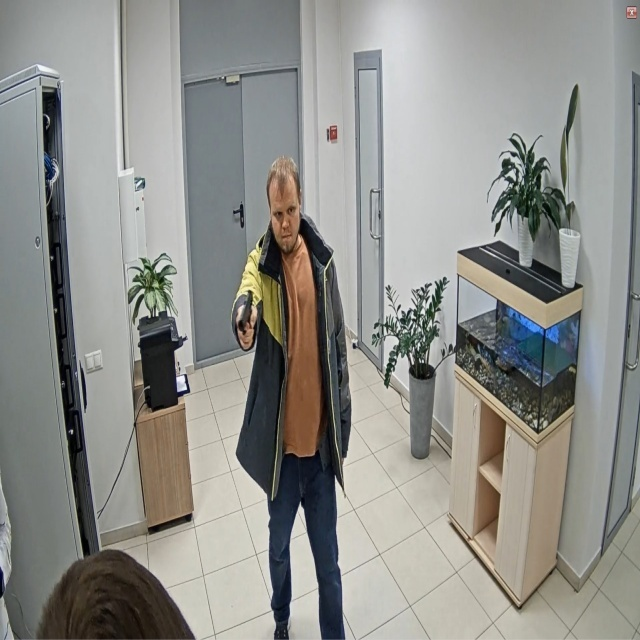

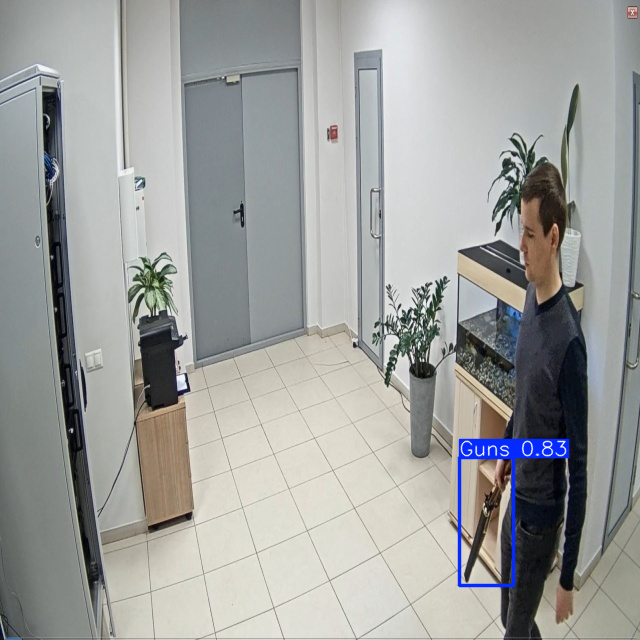

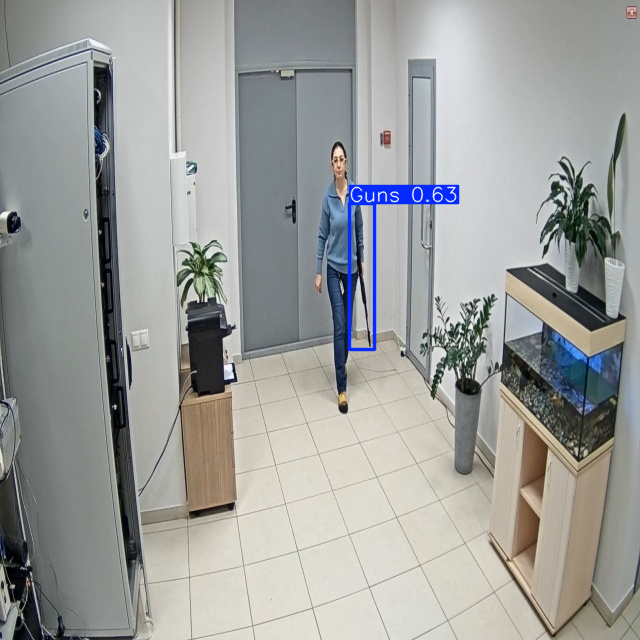

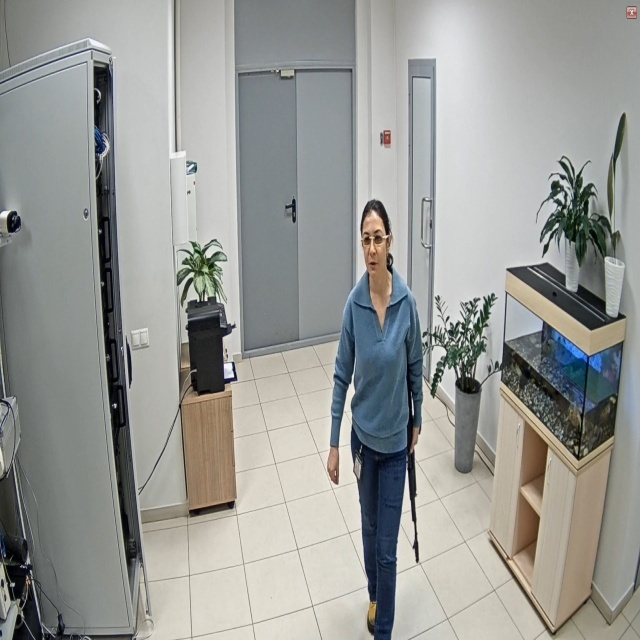

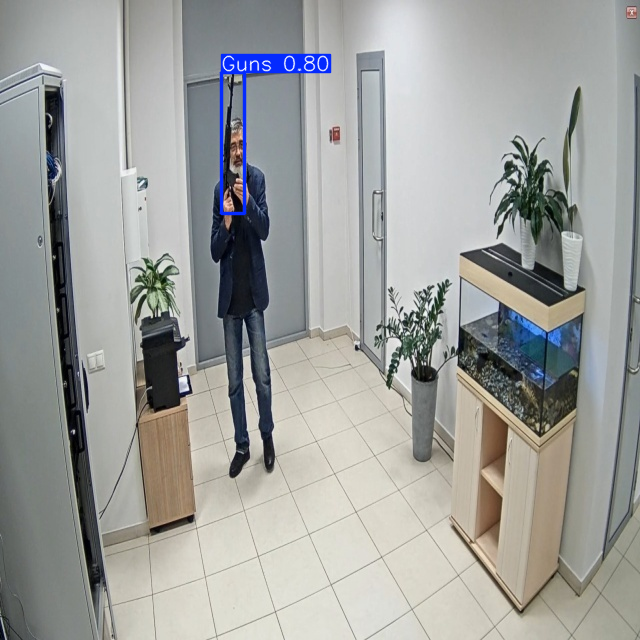

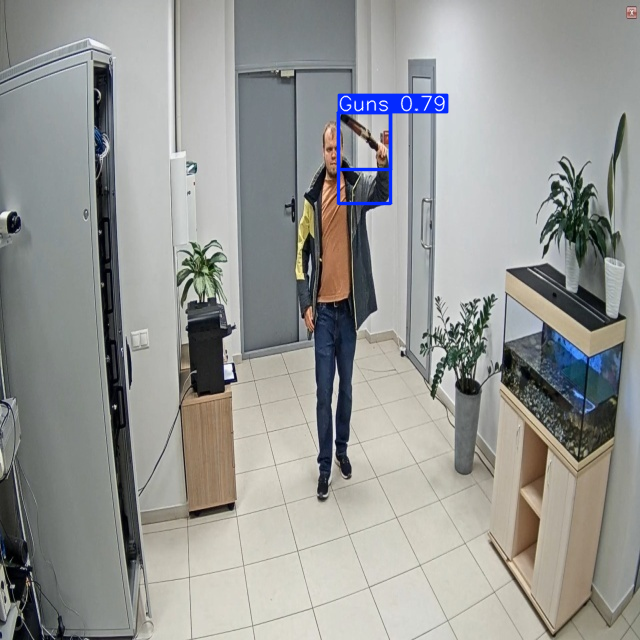

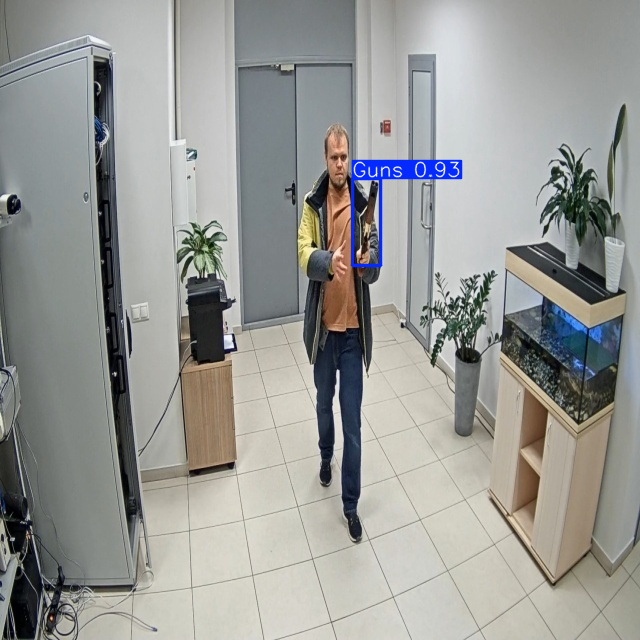

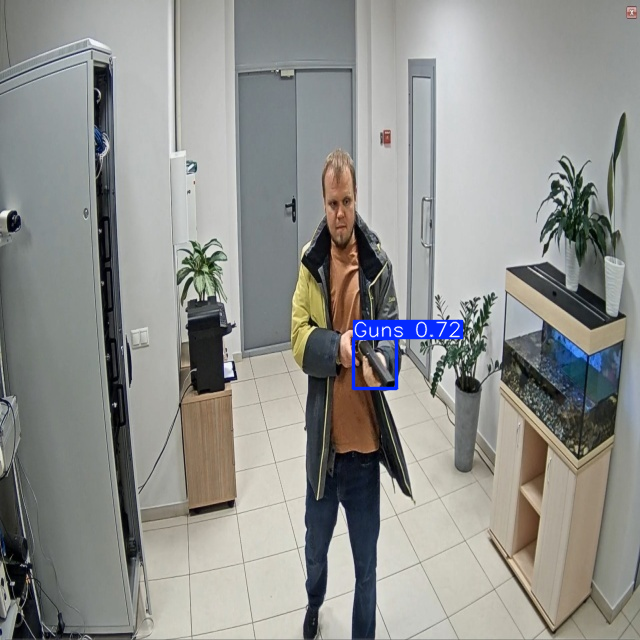

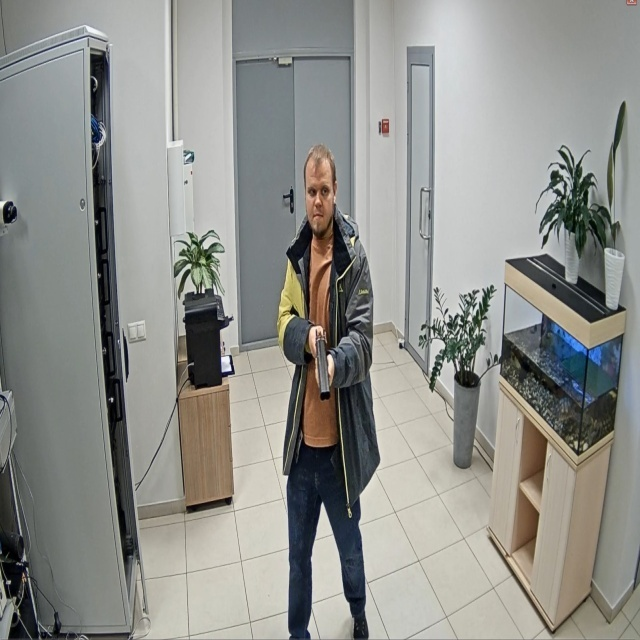

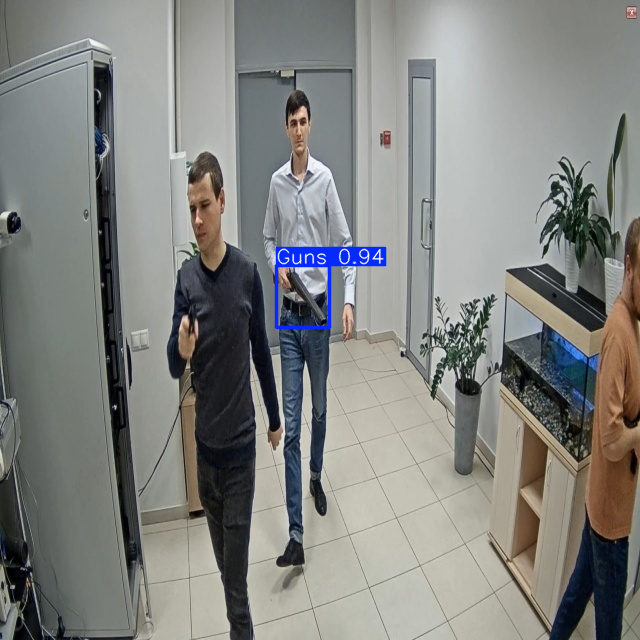

In [19]:
for result in predictions:
    result.show()